## Task 1: Write an SQL query in Python to extract the country names and regions associated with them.

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector as sql

In [83]:
db=sql.connect(host='localhost',user='root',password='12345',database='hr')
cursor=db.cursor()

In [84]:
data="SELECT*FROM countries"
cursor.execute(data)
data1=cursor.fetchall()
data1

[('AR', 'Argentina', 2),
 ('AU', 'Australia', 3),
 ('BE', 'Belgium', 1),
 ('BR', 'Brazil', 2),
 ('CA', 'Canada', 2),
 ('CH', 'Switzerland', 1),
 ('CN', 'China', 3),
 ('DE', 'Germany', 1),
 ('DK', 'Denmark', 1),
 ('EG', 'Egypt', 4),
 ('FR', 'France', 1),
 ('HK', 'HongKong', 3),
 ('IL', 'Israel', 4),
 ('IN', 'India', 3),
 ('IT', 'Italy', 1),
 ('JP', 'Japan', 3),
 ('KW', 'Kuwait', 4),
 ('MX', 'Mexico', 2),
 ('NG', 'Nigeria', 4),
 ('NL', 'Netherlands', 1),
 ('SG', 'Singapore', 3),
 ('UK', 'United Kingdom', 1),
 ('US', 'United States of America', 2),
 ('ZM', 'Zambia', 4),
 ('ZW', 'Zimbabwe', 4)]

In [29]:
data2="SELECT * FROM regions"
cursor.execute(data2)
data3=cursor.fetchall()
data3

[(1, 'Europe'), (2, 'Americas'), (3, 'Asia'), (4, 'Middle East and Africa')]

In [30]:
join="SELECT country_name,region_name FROM hr.regions r RIGHT JOIN hr.countries c ON r.region_id=c.region_id;"
cursor.execute(join)
for i in cursor:
    print(i)

('Argentina', 'Americas')
('Australia', 'Asia')
('Belgium', 'Europe')
('Brazil', 'Americas')
('Canada', 'Americas')
('Switzerland', 'Europe')
('China', 'Asia')
('Germany', 'Europe')
('Denmark', 'Europe')
('Egypt', 'Middle East and Africa')
('France', 'Europe')
('HongKong', 'Asia')
('Israel', 'Middle East and Africa')
('India', 'Asia')
('Italy', 'Europe')
('Japan', 'Asia')
('Kuwait', 'Middle East and Africa')
('Mexico', 'Americas')
('Nigeria', 'Middle East and Africa')
('Netherlands', 'Europe')
('Singapore', 'Asia')
('United Kingdom', 'Europe')
('United States of America', 'Americas')
('Zambia', 'Middle East and Africa')
('Zimbabwe', 'Middle East and Africa')


## Task 2: Display the country-wise employee counts in a new table and push it into an RDBMS. This needs joining of tables. Once task is completed, this query can be executed directly using MYSQL witout the need of join.

In [38]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [39]:
sql1=("select country_name,count(employee_id) from countries inner join locations inner join departments inner join employees on countries.country_id=locations.country_id group by country_name")
cursor.execute(sql1)
emp_cnt=cursor.fetchall()
emp_cnt

[('Australia', 2889),
 ('Brazil', 2889),
 ('Canada', 5778),
 ('Switzerland', 5778),
 ('China', 2889),
 ('Germany', 2889),
 ('India', 2889),
 ('Italy', 5778),
 ('Japan', 5778),
 ('Mexico', 2889),
 ('Netherlands', 2889),
 ('Singapore', 2889),
 ('United Kingdom', 8667),
 ('United States of America', 11556)]

In [40]:
df_emp=pd.DataFrame(emp_cnt,columns=['Country names','Counts of employees'])
df_emp

,Country names,Counts of employees
0,Australia,2889
1,Brazil,2889
2,Canada,5778
3,Switzerland,5778
4,China,2889
5,Germany,2889
6,India,2889
7,Italy,5778
8,Japan,5778
9,Mexico,2889


In [41]:
import pandas as pd
from sqlalchemy import create_engine

hostname="localhost"
dbname="hr"
uname="root"
pwd="12345"

engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
.format(host=hostname, db=dbname, user=uname, pw=pwd))

# Convert dataframe to sql table                                   
df_emp.to_sql('Country_wise_count', engine, index=False) # country wise count details is the name of the table

ValueError: Table 'Country_wise_count' already exists.

## Task 3: Display country-wise and city-wise employee counts. 

In [85]:
cursor.execute("""SELECT countries.country_name, locations.city, COUNT(employees.employee_id) AS employee_count
FROM countries
INNER JOIN locations ON countries.country_id = locations.country_id
INNER JOIN departments ON locations.location_id = departments.location_id
INNER JOIN employees ON employees.department_id = departments.department_id
GROUP BY countries.country_name, locations.city""")

result =cursor.fetchall()
result

[('United States of America', 'Southlake', 5),
 ('United States of America', 'South San Francisco', 45),
 ('United States of America', 'Seattle', 18),
 ('Canada', 'Toronto', 2),
 ('United Kingdom', 'London', 1),
 ('United Kingdom', 'Oxford', 34),
 ('Germany', 'Munich', 1)]

In [86]:
df_data2=pd.DataFrame(result,columns=['Country name','city','count of employees'])
df_data2

,Country name,city,count of employees
0,United States of America,Southlake,5
1,United States of America,South San Francisco,45
2,United States of America,Seattle,18
3,Canada,Toronto,2
4,United Kingdom,London,1
5,United Kingdom,Oxford,34
6,Germany,Munich,1


In [100]:
df_data2.sort_values(['count of employees'],ascending=False,inplace=True)

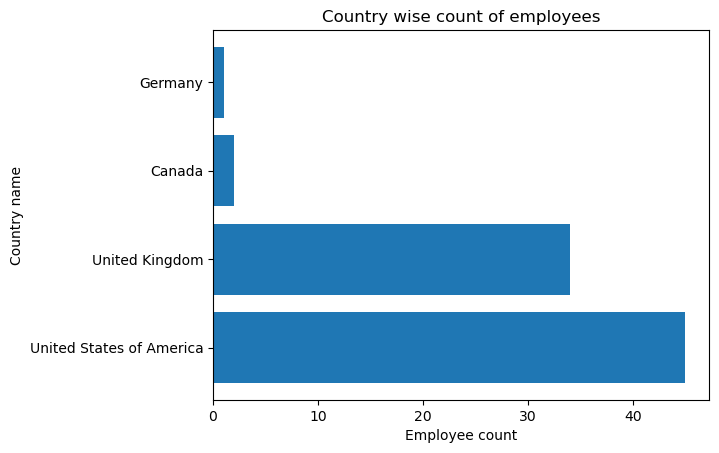

In [104]:
plt.barh(df_data2['Country name'],df_data2['count of employees'])
plt.title('Country wise count of employees')
plt.xlabel('Employee count')
plt.ylabel('Country name')
plt.show()

#### Interpretation: Country 'United states of America' has the highest number of employees i.e, 45.

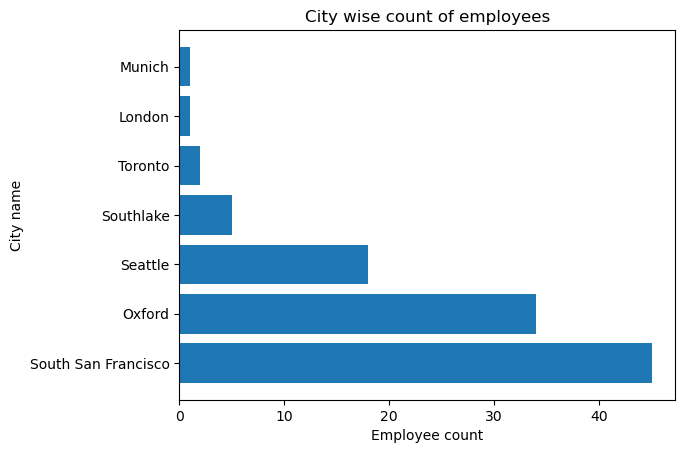

In [105]:
plt.barh(df_data2['city'],df_data2['count of employees'])
plt.title('City wise count of employees')
plt.xlabel('Employee count')
plt.ylabel('City name')
plt.show()

#### Interpretation: City named 'South San Francisco' has the highest count of employees i.e, 45.